# 01. Usage Guide

## Parts of a Figure

### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

The easiest way to create a new figure is with pyplot:

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OO interface.

### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist
Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Types of inputs to plotting functions

All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

For example, to convert a pandas.DataFrame:

In [19]:
import pandas as pd
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values

and to convert a np.matrix

In [20]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

## Matplotlib, pyplot and pylab: how are they related?

Matplotlib is the whole package and matplotlib.pyplot is a module in Matplotlib.

For functions in the pyplot module, there is always a "current" figure and axes (which is created automatically on request). For example, in the following example, the first call to plt.plot creates the axes, then subsequent calls to plt.plot add additional lines on the same axes, and plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and add a legend.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

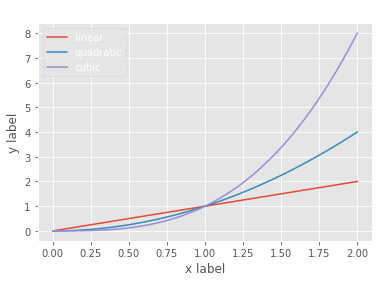

In [23]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

## Coding Styles

When viewing this documentation and examples, you will find different coding styles and usage patterns. These styles are perfectly valid and have their pros and cons. Just about all of the examples can be converted into another style and achieve the same results. The only caveat is to avoid mixing the coding styles for your own code

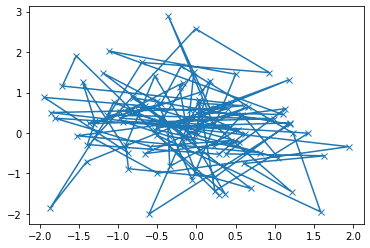

In [12]:
def my_plotter(ax, x_data, y_data, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    x_data : array
       The x data

    y_data : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(x_data, y_data, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

plt.show()

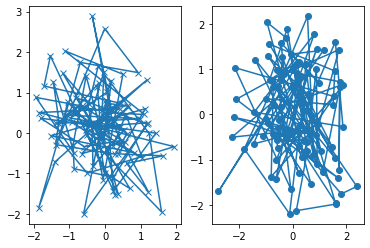

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

plt.show()

## Backends

### What is a backend?

Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs

To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure

### What is interactive mode?

There are two types of backends: **User Interface backends** (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") and **hardcopy backends** to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

With a typical installation of matplotlib, such as from a binary installer or a linux distribution package, a good default backend will already be set, allowing both interactive work and plotting from scripts, with output to the screen and/or to a file, so at least initially you will not need to use any of the methods given above.

To make things a little more customizable for graphical user interfaces, matplotlib separates the concept of the renderer (the thing that actually does the drawing) from the canvas (the place where the drawing goes). The canonical renderer for user interfaces is Agg which uses the Anti-Grain Geometry C++ library to make a raster (pixel) image of the figure. All of the user interfaces except macosx can be used with agg rendering, e.g., WXAgg, GTK3Agg, QT4Agg, QT5Agg, TkAgg. In addition, some of the user interfaces support other rendering engines. For example, with GTK+ 3, you can also select Cairo rendering (backend GTK3Cairo).

For the rendering engines, one can also distinguish between vector or raster renderers. Vector graphics languages issue drawing commands like "draw a line from this point to this point" and hence are scale free, and raster backends generate a pixel representation of the line whose accuracy depends on a DPI setting.

### What is interactive mode?

Use of an interactive backend (see What is a backend?) permits--but does not by itself require or ensure--plotting to the screen. Whether and when plotting to the screen occurs, and whether a script or shell session continues after a plot is drawn on the screen, depends on the functions and methods that are called, and on a state variable that determines whether matplotlib is in "interactive mode".

Interactive mode may also be turned on via `matplotlib.pyplot.ion()`, and turned off via `matplotlib.pyplot.ioff()`
The default Boolean value is set by the matplotlibrc file, and may be customized like any other configuration parameter (see Customizing Matplotlib with style sheets and `rcParams`). It may also be set via `matplotlib.interactive()`, and its value may be queried via matplotlib.is_interactive()

## Performance

Whether exploring data in interactive mode or programmatically saving lots of plots, rendering performance can be a painful bottleneck in your pipeline. Matplotlib provides a couple ways to greatly reduce rendering time at the cost of a slight change (to a settable tolerance) in your plot's appearance. The methods available to reduce rendering time depend on the type of plot that is being created

### Line segment simplification
For plots that have line segments (e.g. typical line plots, outlines of polygons, etc.), rendering performance can be controlled by the path.simplify and path.simplify_threshold parameters in your matplotlibrc file (see Customizing Matplotlib with style sheets and rcParams for more information about the matplotlibrc file). The path.simplify parameter is a boolean indicating whether or not line segments are simplified at all. The path.simplify_threshold parameter controls how much line segments are simplified; higher thresholds result in quicker rendering.

The following script will first display the data without any simplification, and then display the same data with simplification. Try interacting with both of them:

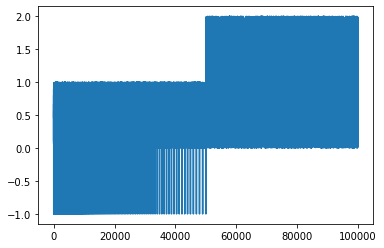

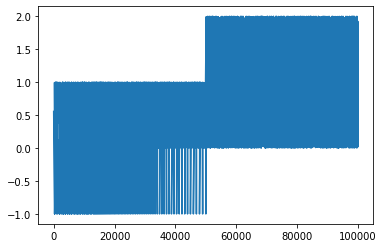

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

Matplotlib currently defaults to a conservative simplification threshold of 1/9. If you want to change your default settings to use a different value, you can change your matplotlibrc file. Alternatively, you could create a new style for interactive plotting (with maximal simplification) and another style for publication quality plotting (with minimal simplification) and activate them as necessary

### Marker simplification
Markers can also be simplified, albeit less robustly than line segments. Marker simplification is only available to Line2D objects (through the markevery property). Wherever Line2D construction parameters are passed through, such as matplotlib.pyplot.plot() and matplotlib.axes.Axes.plot(), the markevery parameter can be used。

### Splitting lines into smaller chunks

If you are using the Agg backend (see What is a backend?), then you can make use of the agg.path.chunksize rc parameter. This allows you to specify a chunk size, and any lines with greater than that many vertices will be split into multiple lines, each of which has no more than agg.path.chunksize many vertices. (Unless agg.path.chunksize is zero, in which case there is no chunking.) For some kind of data, chunking the line up into reasonable sizes can greatly decrease rendering time.

The following script will first display the data without any chunk size restriction, and then display the same data with a chunk size of 10,000. The difference can best be seen when the figures are large, try maximizing the GUI and then interacting with them:

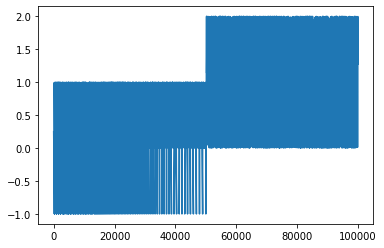

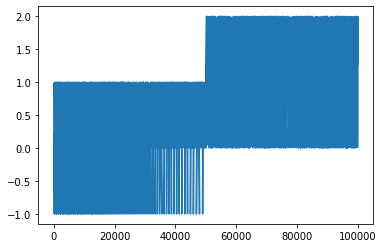

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()

### Legends
The default legend behavior for axes attempts to find the location that covers the fewest data points (loc='best'). This can be a very expensive computation if there are lots of data points. In this case, you may want to provide a specific location.

### Using the fast style
The fast style can be used to automatically set simplification and chunking parameters to reasonable settings to speed up plotting large amounts of data. It can be used simply by running:

In [16]:
import matplotlib.style as mplstyle
mplstyle.use('fast')

In [17]:
mplstyle.use(['dark_background', 'ggplot', 'fast'])